In [219]:
import random
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from matplotlib.pyplot import figure
np.random.seed(0)
import seaborn as sns
import matplotlib.pyplot as plt

In [220]:
#  Generating population randomly with 0's and 1's.
def generate_population(size_of_individual,size_of_population):
    population_list = np.random.randint(2, size=(size_of_population,size_of_individual))
    return population_list

# calculating fitness score of every individual.
def calculate_fitness_score(population_list):
    fitness_score_of_individual = np.count_nonzero(population_list, axis=1,keepdims=True)
    population_list = np.append(population_list,fitness_score_of_individual,axis=1)
    return population_list

# least fitness score individuals are dropped according to the drop percentage given.
# Drop percentage is used to drop number of individuals with least fitness score.
def drop_least_fitness_score(population_list,drop_percentage,size_of_population):
    population_list = population_list[population_list[:,-1].argsort()]
    number_of_rows_to_be_dropped = int(drop_percentage/100 * size_of_population)
    population_list = population_list[number_of_rows_to_be_dropped:]
    return population_list

# After the drop, from the remaining individuals randomly 2 parents are selected for crossover to generate offsprings.
def crossover(population_list,drop_percentage,size_of_population,size_of_individual,crossover_percentage):
    population_list= np.delete(population_list, size_of_individual, 1) # dropping fitness scores column
    number_of_rows_to_be_added = int(drop_percentage/100 * size_of_population)
    individuals_with_high_fitness_score = population_list[-number_of_rows_to_be_added:] # selecting top n individuals with highest fitness score
    crossover_number = int(crossover_percentage/100*size_of_individual)
    child_list = None
    for i in range(0,number_of_rows_to_be_added):
      parent_index = np.random.randint(len(individuals_with_high_fitness_score),size=2) # randomly selecting two parents
      parents = individuals_with_high_fitness_score[parent_index,:]
      crossover_index = random.randint(0,size_of_individual-crossover_number)
      parent_1 = parents[0,:]
      parent_2 = parents[1,:]
      child = np.concatenate((parent_2[0:crossover_index], parent_1[crossover_index:crossover_index+crossover_number],parent_2[crossover_index+crossover_number:]),axis=None)
      child_list = np.concatenate((child_list, [child]), axis=0) if child_list is not None else [child]
    return child_list

# From the generated offsprings, mutation is performed.
def add_mutation(child_list,number_of_mutations,size_of_individual,drop_percentage,size_of_population):
    number_of_rows_to_be_added = int(drop_percentage/100 * size_of_population)
    mutated_child_list = None
    for child in child_list:
        index = np.random.randint(size_of_individual,size=number_of_mutations)
        x=np.zeros(size_of_individual)
        x[index]=1
        x = np.sum([child, x], axis=0)
        x = np.where(x<2,x,0)
        mutated_child_list = np.concatenate((mutated_child_list, [x]), axis=0) if mutated_child_list is not None else [x]
    return mutated_child_list

def add_new_individuals(population_list, child_list):
    fitness_score_of_individual = np.count_nonzero(child_list, axis=1,keepdims=True)
    child_list = np.append(child_list,fitness_score_of_individual,axis=1)
    population_list = np.append(population_list,child_list,axis=0)
    return population_list

# Calculate mean fitness score of population for every generation and storing the values.
def genetic_algorithm(size_of_individual,size_of_population,drop_percentage,crossover_percentage,mutation_percentage,number_of_generations):
  number_of_mutations= int(mutation_percentage/100 * size_of_individual)
  population = generate_population(size_of_individual=size_of_individual,size_of_population=size_of_population)
  population=calculate_fitness_score(population)
  fitness_score_for_generations = {}
  # while np.sum(population[:, -1]) != size_of_individual*size_of_population:
  for i in range(number_of_generations):
    population= drop_least_fitness_score(population_list=population,drop_percentage=drop_percentage,size_of_population=size_of_population)
    d=crossover(population_list=population,drop_percentage=drop_percentage,size_of_population=size_of_population,size_of_individual=size_of_individual,crossover_percentage=crossover_percentage)
    e = add_mutation(child_list=d,number_of_mutations=number_of_mutations,size_of_population=size_of_population,size_of_individual=size_of_individual,drop_percentage=drop_percentage)
    population=add_new_individuals(population,e)
    z = [population[:,-1] == size_of_individual]
    fraction_of_population_with_max_fitness_score = np.count_nonzero(z)/size_of_population
    fitness_score_for_generations[i]=np.mean(population[:, -1])
  return fitness_score_for_generations

# Calculate mean and std of fitness scores for 100 generations after every iteration and storing the values.
def calculate_mean_std_of_generations(number_of_iterations,size_of_individual,size_of_population,drop_percentage,
                          crossover_percentage,mutation_percentage,number_of_generations):
  fitness_score_per_iteration={}
  for i in range(number_of_iterations):
    a = genetic_algorithm(size_of_individual,size_of_population,drop_percentage,
                          crossover_percentage,mutation_percentage,number_of_generations)
    fitness_score_per_iteration[i]=a
  f = pd.DataFrame(fitness_score_per_iteration).T
  mean_of_fitness_score_generations = f.mean(axis=0)
  std_of_fitness_score_generations = f.std(axis=0)
  return mean_of_fitness_score_generations, std_of_fitness_score_generations

# Plotting a line graph for mean fitness score after every generation.
def fitness_score_and_generations_plot(fitness_score_dict):
  lists = sorted(fitness_score_dict.items())
  x, y = zip(*lists)
  y = [(val/1000)*100 for val in y]
  plt.plot(x,y)
  plt.xlabel("Generations")
  plt.ylabel("Mean_of_Fitness_scores")
  plt.show()
  #plt.savefig(path+'fitness_score_and_generations_plot.png')

# Plotting error bar for mean and std of fitness scores for 30 iterations.
def plot_for_std_mean_of_generations(mean_of_fitness_score_generations,std_of_fitness_score_generations):
  x = mean_of_fitness_score_generations.index
  y = mean_of_fitness_score_generations.tolist()
  yerr = np.linspace(0.05, 0.2, 100)
  figure(figsize=(8, 6), dpi=600)
  plt.errorbar(x, y , yerr=yerr, label='both limits (default)',ecolor= 'blue',elinewidth=2.25)
  plt.xlabel("Generations")
  plt.ylabel("Mean_and_STD_of_Fitness_scores_over_30_iterations")
  plt.plot(x, y)
  plt.errorbar(x, y)
  #plt.savefig(path+'plot_for_std_mean_of_generations.png')

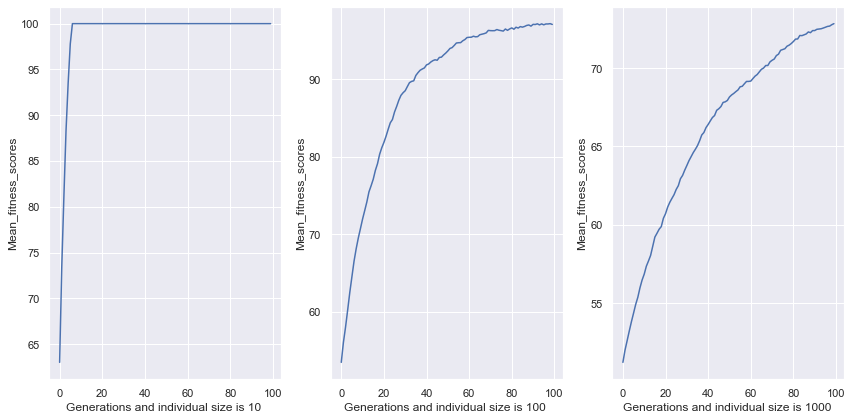

In [221]:
# Mean fitness scores over generations are plotted with different individual sizes.

a1 = genetic_algorithm(size_of_individual=10, size_of_population=100, drop_percentage=50,
                      crossover_percentage=50, mutation_percentage=2, number_of_generations=100)
lists = sorted(a1.items())
x1, y1 = zip(*lists)
y1 = [(val/10)*100 for val in y1]
a2 = genetic_algorithm(size_of_individual=100, size_of_population=100, drop_percentage=50,
                      crossover_percentage=50, mutation_percentage=2, number_of_generations=100)
lists = sorted(a2.items())
x2, y2 = zip(*lists)
y2 = [(val/100)*100 for val in y2]
a3 = genetic_algorithm(size_of_individual=1000, size_of_population=100, drop_percentage=50,
                      crossover_percentage=50, mutation_percentage=2, number_of_generations=100)
lists = sorted(a3.items())
x3, y3 = zip(*lists)
y3 = [(val/1000)*100 for val in y3]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))
axes[0].plot(x1, y1)
axes[1].plot(x2, y2)
axes[2].plot(x3, y3)

axes[0].set(xlabel="Generations and individual size is 10 ", ylabel="Mean_fitness_scores")
axes[1].set(xlabel="Generations and individual size is 100 ", ylabel="Mean_fitness_scores")
axes[2].set(xlabel="Generations and individual size is 1000 ", ylabel="Mean_fitness_scores")
fig.tight_layout()

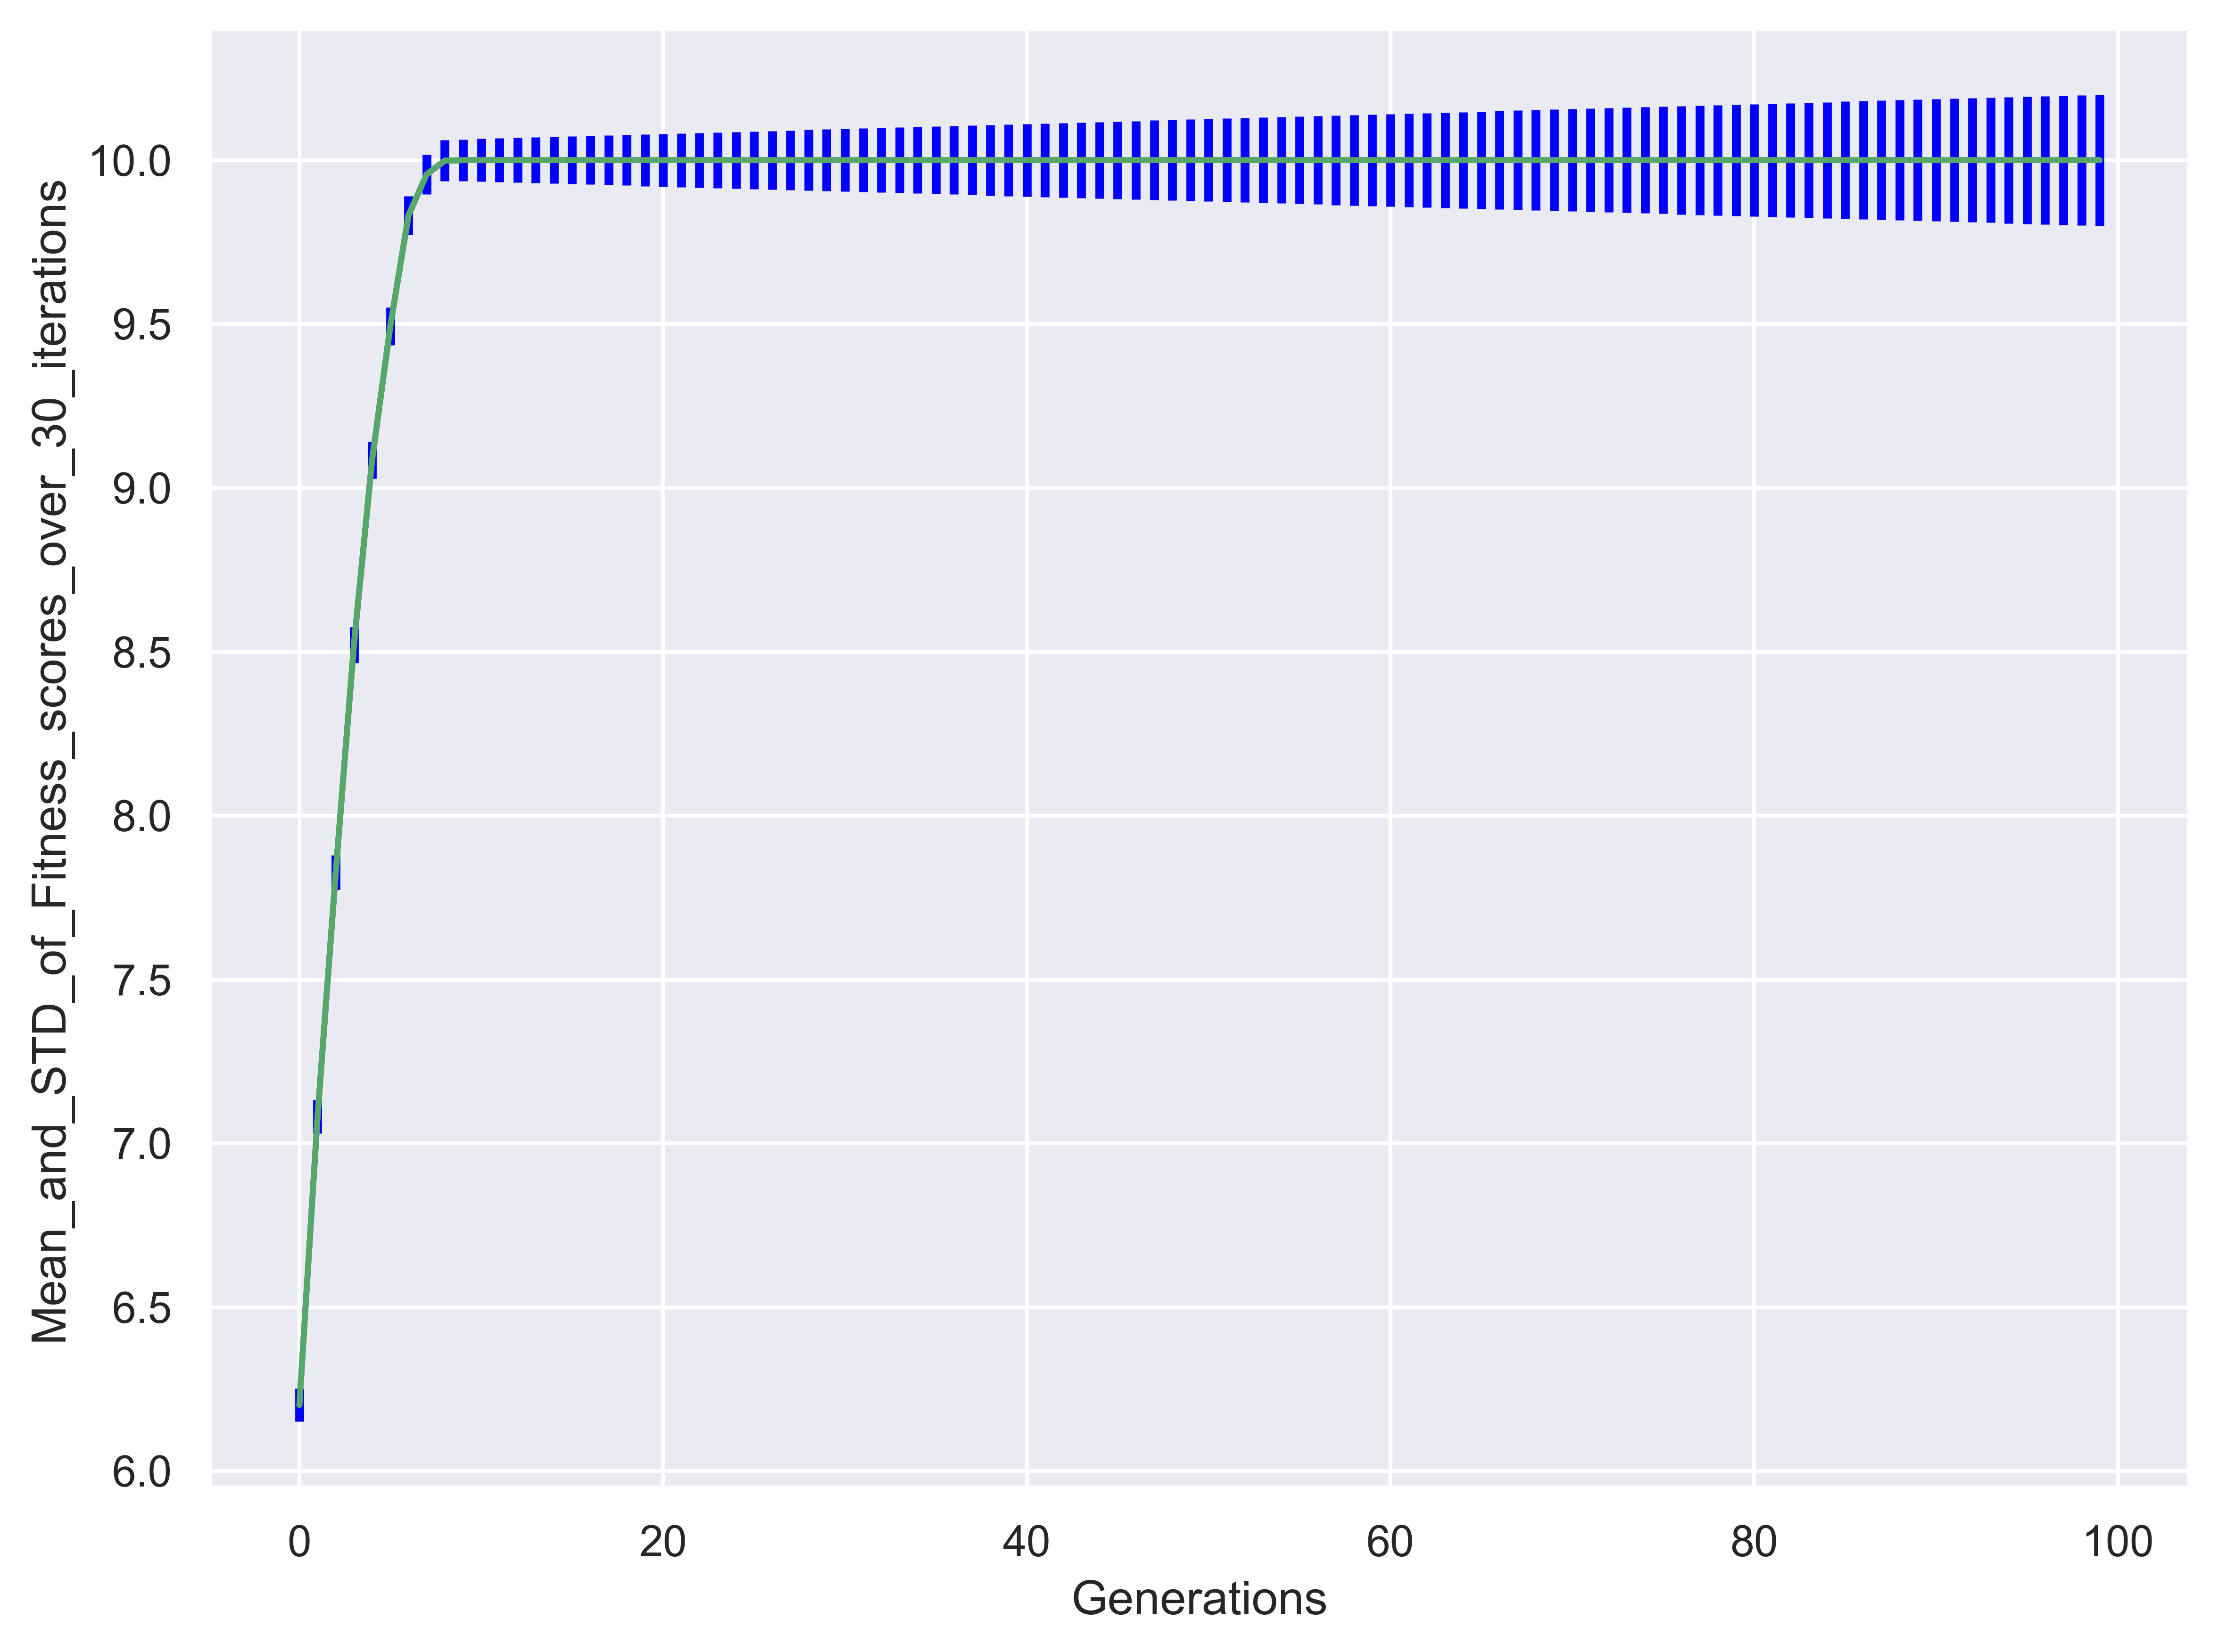

In [222]:
a = genetic_algorithm(size_of_individual=1000,size_of_population=100,drop_percentage=50,
                      crossover_percentage=50,mutation_percentage=2,number_of_generations=100)
b,c = calculate_mean_std_of_generations(number_of_iterations=30,size_of_individual=10,size_of_population=100,drop_percentage=50,
                          crossover_percentage=50,mutation_percentage=2,number_of_generations=100)

# Mean and Std of fitness score after 30 iterations are plotted
plot_for_std_mean_of_generations(mean_of_fitness_score_generations=b,std_of_fitness_score_generations=c)

In [223]:
# Selected Heatmaps for visualizations

def data_for_heatmap(list_of_size_of_population,list_of_drop_percentage):
  list_of_mean_of_different_drop_percentages_and_population_sizes = {}
  list_of_std_of_different_drop_percentages_and_population_sizes = {}
  for i in list_of_size_of_population:
    drop_percentages1={}
    drop_percentages2={}
    for j in list_of_drop_percentage:
      z,d = calculate_mean_std_of_generations(number_of_iterations=30,size_of_individual=10,
                                                size_of_population=i,drop_percentage=j,
                            crossover_percentage=50,mutation_percentage=2,number_of_generations=100)
      drop_percentages1[j]=(z.iloc[-1]/10)*100
      drop_percentages2[j]=(d.iloc[-1]/10)*100
    list_of_mean_of_different_drop_percentages_and_population_sizes[i] = drop_percentages1
    list_of_std_of_different_drop_percentages_and_population_sizes[i] = drop_percentages2
  return list_of_mean_of_different_drop_percentages_and_population_sizes,list_of_std_of_different_drop_percentages_and_population_sizes
uniform_data1,uniform_data2 = data_for_heatmap(list_of_size_of_population=[100,1000],list_of_drop_percentage=[80,40,20,10])
#uniform_data1,uniform_data2 = data_for_heatmap(list_of_size_of_population=[10,100],list_of_drop_percentage=[80,40]) # ---- sample data

uniform_data1 = pd.DataFrame(uniform_data1).round(2)
uniform_data2 = pd.DataFrame(uniform_data2).round(2)
label_df1 = uniform_data1.astype(str) + " ± " + uniform_data2.astype(str)

In [224]:
def data_for_heatmap(list_of_size_of_population,list_of_drop_percentage):
  list_of_mean_of_different_drop_percentages_and_population_sizes = {}
  list_of_std_of_different_drop_percentages_and_population_sizes = {}
  for i in list_of_size_of_population:
    drop_percentages1={}
    drop_percentages2={}
    for j in list_of_drop_percentage:
      z,d = calculate_mean_std_of_generations(number_of_iterations=30,size_of_individual=100,
                                                size_of_population=i,drop_percentage=j,
                            crossover_percentage=50,mutation_percentage=2,number_of_generations=100)
      drop_percentages1[j]=(z.iloc[-1]/100)*100
      drop_percentages2[j]=(d.iloc[-1]/100)*100
    list_of_mean_of_different_drop_percentages_and_population_sizes[i] = drop_percentages1
    list_of_std_of_different_drop_percentages_and_population_sizes[i] = drop_percentages2
  return list_of_mean_of_different_drop_percentages_and_population_sizes, list_of_std_of_different_drop_percentages_and_population_sizes
uniform_data3, uniform_data4 = data_for_heatmap(list_of_size_of_population=[100,1000],list_of_drop_percentage=[80,40,20,10])
#uniform_data3, uniform_data4 = data_for_heatmap(list_of_size_of_population=[10,100],list_of_drop_percentage=[80,40])   # ----   sample to test

# Heatmap for  mean fitness score over generations with different drop percentages and different size of populations
uniform_data3 = pd.DataFrame(uniform_data3).round(2)
uniform_data4 = pd.DataFrame(uniform_data4).round(2)
label_df2 = uniform_data3.astype(str) + "± " + uniform_data4.astype(str)

In [225]:
def data_for_heatmap(list_of_size_of_population,list_of_drop_percentage):
  list_of_mean_of_different_drop_percentages_and_population_sizes = {}
  list_of_std_of_different_drop_percentages_and_population_sizes = {}
  for i in list_of_size_of_population:
    drop_percentages1={}
    drop_percentages2={}
    for j in list_of_drop_percentage:
      z,d = calculate_mean_std_of_generations(number_of_iterations=30,size_of_individual=1000,
                                                size_of_population=i,drop_percentage=j,
                            crossover_percentage=50,mutation_percentage=2,number_of_generations=100)
      drop_percentages1[j]=(z.iloc[-1]/1000)*100
      drop_percentages2[j]=(d.iloc[-1]/1000)*100
    list_of_mean_of_different_drop_percentages_and_population_sizes[i] = drop_percentages1
    list_of_std_of_different_drop_percentages_and_population_sizes[i] = drop_percentages2
  return list_of_mean_of_different_drop_percentages_and_population_sizes, list_of_std_of_different_drop_percentages_and_population_sizes
uniform_data5, uniform_data6 = data_for_heatmap(list_of_size_of_population=[100,1000],list_of_drop_percentage=[80,40,20,10])
#uniform_data5, uniform_data6 = data_for_heatmap(list_of_size_of_population=[10,100],list_of_drop_percentage=[80,40])   # ----   sample to test

# Heatmap for  mean fitness score over generations with different drop percentages and different size of populations
uniform_data5 = pd.DataFrame(uniform_data5).round(2)
uniform_data6 = pd.DataFrame(uniform_data6).round(2)
label_df3 = uniform_data5.astype(str) + " ± " + uniform_data6.astype(str)

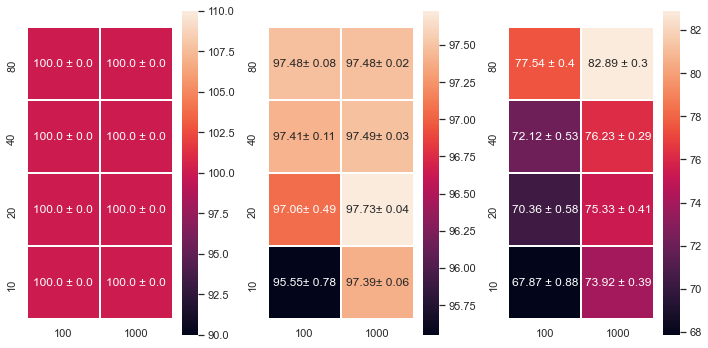

In [226]:
# Size of individual is 10, 100, 1000
# Drop percentags are 10, 20, 40, 80
# Size of population is 100 and 1000
# plotted heatmaps with varying individual size, population size and drop percentages and checked how convergence is taking place.

fig, ax =plt.subplots(1,3)
sns.heatmap(uniform_data1, annot= label_df1, ax=ax[0], fmt="",linewidth=1,square=True)
sns.heatmap(uniform_data3, annot = label_df2, ax=ax[1],fmt="",linewidth=1,square=True)
sns.heatmap(uniform_data5, annot=label_df3, ax=ax[2],fmt="",linewidth=1,square=True)
plt.show()

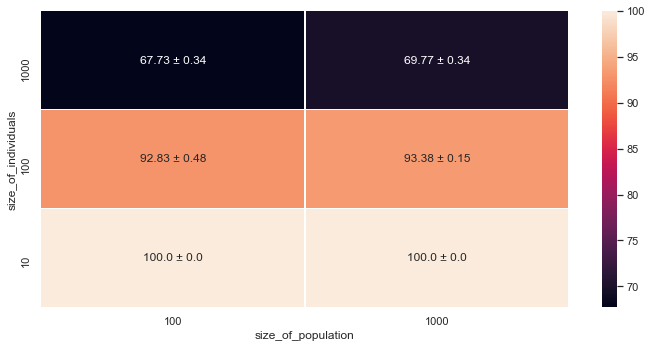

In [227]:
# Heatmap for mean fitness score over 30 iterations with varying size of individuals and also size of populations and checked how the convergence is taking place.

def heatmap_individuals_population(size_of_population,size_of_individual):
  list_of_mean_of_different_size_of_individuals_and_population_sizes = {}
  list_of_std_of_different_size_of_individuals_and_population_sizes = {}
  for p_size in size_of_population:
    individual_sizes1 = {}
    individual_sizes2 = {}
    for s_individual in size_of_individual:
      z,d = calculate_mean_std_of_generations(number_of_iterations=30,size_of_individual=s_individual,size_of_population=p_size,
                                              drop_percentage=40,crossover_percentage=50,mutation_percentage=4,number_of_generations=100)
      individual_sizes1[s_individual]= (z.iloc[-1]/s_individual)*100
      individual_sizes2[s_individual]= (d.iloc[-1]/s_individual)*100
    list_of_mean_of_different_size_of_individuals_and_population_sizes[p_size] = individual_sizes1
    list_of_std_of_different_size_of_individuals_and_population_sizes[p_size] = individual_sizes2
  return list_of_mean_of_different_size_of_individuals_and_population_sizes, list_of_std_of_different_size_of_individuals_and_population_sizes
uniform_data1, uniform_data2 = heatmap_individuals_population(size_of_population=[100,1000],size_of_individual=[1000,100,10])
#uniform_data1, uniform_data2  = heatmap_individuals_population(size_of_population=[10,100],size_of_individual=[20,10])  #--- data to test


uniform_data1 = pd.DataFrame(uniform_data1).round(2)
uniform_data2 = pd.DataFrame(uniform_data2).round(2)
label_df = uniform_data1.astype(str) + " ± " + uniform_data2.astype(str)
sns.heatmap(uniform_data1, annot=label_df, fmt="",linewidth=0.5)
plt.xlabel("size_of_population")
plt.ylabel("size_of_individuals")
plt.show()
#plt.savefig(path+'heatmap_individuals_population.png')

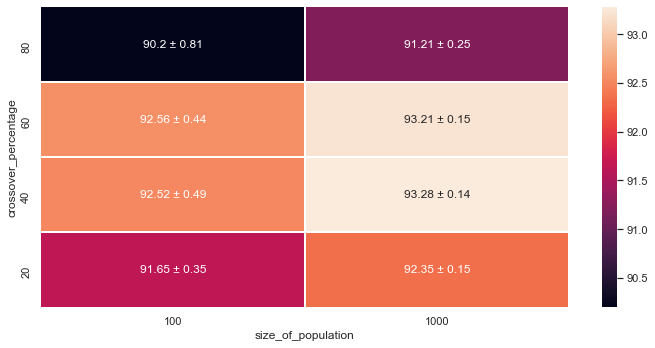

In [228]:
# Heatmap for mean fitness score over 30 iterations with varying  size of populations and crossover percentages and checked how the convergence is taking place.

def heatmap_crossover_percentage_population_size(size_of_population,crossover_percentage):
  list_of_mean_of_different_crossover_percentages_and_population_sizes = {}
  list_of_std_of_different_crossover_percentages_and_population_sizes = {}
  for p_size in size_of_population:
    crossover_values1 = {}
    crossover_values2 = {}
    for crossover in crossover_percentage:
      z,d = calculate_mean_std_of_generations(number_of_iterations=30,size_of_individual=100,size_of_population=p_size,
                                              drop_percentage=40,crossover_percentage=crossover,mutation_percentage=4,number_of_generations=100)
      crossover_values1[crossover]= (z.iloc[-1]/100)*100
      crossover_values2[crossover]= (d.iloc[-1]/100)*100
    list_of_mean_of_different_crossover_percentages_and_population_sizes[p_size] = crossover_values1
    list_of_std_of_different_crossover_percentages_and_population_sizes[p_size] = crossover_values2
  return list_of_mean_of_different_crossover_percentages_and_population_sizes, list_of_std_of_different_crossover_percentages_and_population_sizes
uniform_data1, uniform_data2 = heatmap_crossover_percentage_population_size(size_of_population=[100,1000],crossover_percentage = [80,60,40,20])
#uniform_data1, uniform_data2 = heatmap_crossover_percentage_population_size(size_of_population=[10,100],crossover_percentage = [40,20]) # ----- sample data

# Heatmap for  mean fitness score over generations with different mutation percentages and different size of populations
uniform_data1 = pd.DataFrame(uniform_data1).round(2)
uniform_data2 = pd.DataFrame(uniform_data2).round(2)
label_df = uniform_data1.astype(str) + " ± " + uniform_data2.astype(str)
sns.heatmap(uniform_data1, annot=label_df, fmt="",linewidth=0.5)
plt.xlabel("size_of_population")
plt.ylabel("crossover_percentage")
plt.show()
#plt.savefig(path+'heatmap_mutation_percentage_population_size.png')

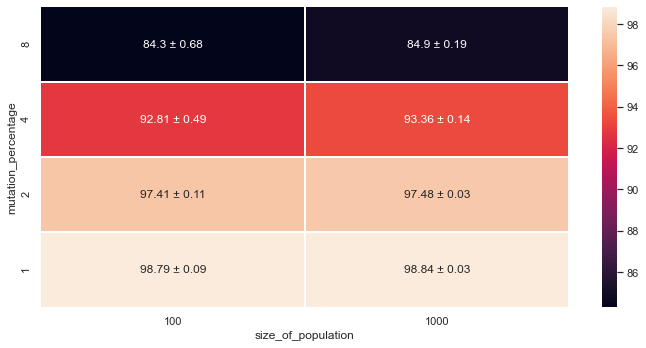

In [229]:
# Heatmap for mean fitness score over 30 iterations with varying  size of populations and mutation percentages and checked how the convergence is taking place.

def heatmap_mutation_percentage_population_size(size_of_population,mutation_percentage):
  list_of_mean_of_different_mutation_percentages_and_population_sizes = {}
  list_of_std_of_different_mutation_percentages_and_population_sizes = {}
  for p_size in size_of_population:
    mutation_values1 = {}
    mutation_values2 = {}
    for mutation in mutation_percentage:
      z,d = calculate_mean_std_of_generations(number_of_iterations=30,size_of_individual=100,size_of_population=p_size,
                                              drop_percentage=40,crossover_percentage=50,mutation_percentage=mutation,number_of_generations=100)
      mutation_values1[mutation]= (z.iloc[-1]/100)*100
      mutation_values2[mutation]= (d.iloc[-1]/100)*100
    list_of_mean_of_different_mutation_percentages_and_population_sizes[p_size] = mutation_values1
    list_of_std_of_different_mutation_percentages_and_population_sizes[p_size] = mutation_values2
  return list_of_mean_of_different_mutation_percentages_and_population_sizes, list_of_std_of_different_mutation_percentages_and_population_sizes
uniform_data1, uniform_data2 = heatmap_mutation_percentage_population_size(size_of_population=[100,1000],mutation_percentage = [8,4,2,1])
#uniform_data1, uniform_data2 = heatmap_mutation_percentage_population_size(size_of_population=[10,100],mutation_percentage = [2,1]) # ----- sample data

# Heatmap for  mean fitness score over generations with different mutation percentages and different size of populations
uniform_data1 = pd.DataFrame(uniform_data1).round(2)
uniform_data2 = pd.DataFrame(uniform_data2).round(2)
label_df = uniform_data1.astype(str) + " ± " + uniform_data2.astype(str)
sns.heatmap(uniform_data1, annot=label_df, fmt="",linewidth=0.5)
plt.xlabel("size_of_population")
plt.ylabel("mutation_percentage")
plt.show()
#plt.savefig(path+'heatmap_mutation_percentage_population_size.png')